From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. In this hackathon, Data Science and Machine Learning enthusiasts like you will use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

# FEATURES:

## STORY:  A part of the main content of the article to be published as a piece of news.
## SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

# NEWS CATEGORY PREDICTION

In [89]:
import pandas as pd

In [90]:
df=pd.read_csv('TrainDataset.csv')

In [91]:
test=pd.read_csv('TestDataset.csv')

In [92]:
df.head()

,STORY,SECTION
0,The roadshow and the filing of nomination pape...,0
1,These vulnerabilities could have allowed hacke...,1
2,"""People will now be able to include music in t...",1
3,Jersey is expected to have a good start at the...,2
4,Xiaomi’s unveiling also hints at how Samsung i...,1


In [93]:
test.head()

,STORY
0,Privileged to have done this candid and COMPLE...
1,6) Some analysts expect volatility to remain h...
2,There is no stopping Marvel Cinematic Universe...
3,"According to Ravi Menon, analyst at Elara Secu..."
4,"A complaint against Nadiadwala, known for prod..."


In [94]:
df['STORY'].head()

0    The roadshow and the filing of nomination pape...
1    These vulnerabilities could have allowed hacke...
2    "People will now be able to include music in t...
3    Jersey is expected to have a good start at the...
4    Xiaomi’s unveiling also hints at how Samsung i...
Name: STORY, dtype: object

In [95]:
test['STORY'].head()

0    Privileged to have done this candid and COMPLE...
1    6) Some analysts expect volatility to remain h...
2    There is no stopping Marvel Cinematic Universe...
3    According to Ravi Menon, analyst at Elara Secu...
4    A complaint against Nadiadwala, known for prod...
Name: STORY, dtype: object

In [96]:
import seaborn as sns

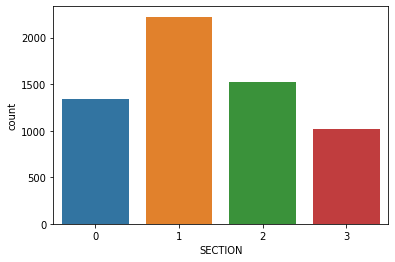

In [97]:
sns.countplot(x='SECTION',data=df)

### we can see that most of the articles are from  Technology category

In [98]:
import os
import nltk
nltk.download('punkt')
import nltk.corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Lowercasing the words

### for train

In [99]:
words = []
for i in df['STORY']:
    words.append(i.lower())
df['STORY']=words

In [100]:
df['STORY'].head()

0    the roadshow and the filing of nomination pape...
1    these vulnerabilities could have allowed hacke...
2    "people will now be able to include music in t...
3    jersey is expected to have a good start at the...
4    xiaomi’s unveiling also hints at how samsung i...
Name: STORY, dtype: object

### for test

In [101]:
words = []
for i in test['STORY']:
    words.append(i.lower())
test['STORY']=words

In [102]:
test['STORY'].head()

0    privileged to have done this candid and comple...
1    6) some analysts expect volatility to remain h...
2    there is no stopping marvel cinematic universe...
3    according to ravi menon, analyst at elara secu...
4    a complaint against nadiadwala, known for prod...
Name: STORY, dtype: object

# Removing Punctuation

### for train

In [103]:
import string

In [104]:
df['STORY']=df['STORY'].str.replace('[{}]'.format(string.punctuation), '')

In [105]:
df['STORY'].head()

0    the roadshow and the filing of nomination pape...
1    these vulnerabilities could have allowed hacke...
2    people will now be able to include music in th...
3    jersey is expected to have a good start at the...
4    xiaomi’s unveiling also hints at how samsung i...
Name: STORY, dtype: object

In [106]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### for test

In [107]:
import string

In [108]:
test['STORY']=test['STORY'].str.replace('[{}]'.format(string.punctuation), '')

In [109]:
test['STORY'].head()

0    privileged to have done this candid and comple...
1    6 some analysts expect volatility to remain hi...
2    there is no stopping marvel cinematic universe...
3    according to ravi menon analyst at elara secur...
4    a complaint against nadiadwala known for produ...
Name: STORY, dtype: object

# REMOVING STOP WORDS

### for train 

In [110]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [111]:
for stop_word in stop_words:
    regex_stopword=r"\b" + stop_word + r"\b"
    df['STORY']=df['STORY'].str.replace(regex_stopword,'')

In [112]:
df['STORY'].head()

0     roadshow   filing  nomination papers  also  a...
1     vulnerabilities could  allowed hackers  acces...
2    people    able  include music   videos  facebo...
3    jersey  expected    good start   box office   ...
4    xiaomi’ unveiling also hints   samsung  starti...
Name: STORY, dtype: object

### for test

In [113]:
for stop_word_1 in stop_words:
    regex_stopword_1 = r"\b" + stop_word_1 + r"\b"
    test['STORY']=test['STORY'].str.replace(regex_stopword_1,'')

In [114]:
test['STORY'].head()

0    privileged   done  candid  completely non poli...
1    6  analysts expect volatility  remain high   n...
2       stopping marvel cinematic universe’ latest ...
3    according  ravi menon analyst  elara securitie...
4     complaint  nadiadwala known  producing hit hi...
Name: STORY, dtype: object

# Lemmatization and Word Tokenization

### for train

In [115]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [117]:
wnl = WordNetLemmatizer()

### appending our feature i.e  df['STORY']  into a list because after tokenization we assign the tokenized words to a list so that both will be of same data type

In [118]:
phrase=[]
for i in df['STORY']:
    phrase.append(i)

In [119]:
lemm=[]
for i in range(len(phrase)):
    words=nltk.word_tokenize(phrase[i])
    words=[wnl.lemmatize(word) for word in words]
    lemm.append(' '.join(words))

In [120]:
df['STORY']=lemm

In [121]:
df['STORY'].head()

0    roadshow filing nomination paper also attempt ...
1    vulnerability could allowed hacker access sens...
2    people able include music video facebook insta...
3    jersey expected good start box office attentio...
4    xiaomi ’ unveiling also hint samsung starting ...
Name: STORY, dtype: object

### for test

In [122]:
phrase_1=[]
for i in test['STORY']:
    phrase_1.append(i)

In [123]:
lemm_1=[]
for i in range(len(phrase_1)):
    words=nltk.word_tokenize(phrase_1[i])
    words=[wnl.lemmatize(word) for word in words]
    lemm_1.append(' '.join(words))

In [124]:
test['STORY']=lemm_1

In [125]:
test['STORY'].head()

0    privileged done candid completely non politica...
1    6 analyst expect volatility remain high near t...
2    stopping marvel cinematic universe ’ latest of...
3    according ravi menon analyst elara security in...
4    complaint nadiadwala known producing hit hindi...
Name: STORY, dtype: object

# TF-IDF

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

### for train

In [127]:
tv = TfidfVectorizer()

In [128]:
df_response = tv.fit_transform(lemm).toarray()

### for test

In [129]:
test_response = tv.fit_transform(lemm_1).toarray()

## shape checking

In [130]:
print(df_response.shape)
print(test_response.shape)

(6102, 31999)
(1526, 15887)


## combining the both the data sets to build a common vectorized form and splitting them again

In [131]:
combined = lemm + lemm_1

In [132]:
len(combined)

7628

In [133]:
combined_df=tv.fit_transform(combined).toarray()

In [134]:
df_combined = combined_df[:6102,:]       ## length of lemm (train)

In [135]:
test_combined = combined_df[-1526:,:]    ## length of lemm1 (test)

# PREDICTIVE MODELING

In [136]:
x=df_combined
y=df['SECTION']

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [139]:
y_train.head()

3741    1
3790    0
5247    0
2934    3
1874    1
Name: SECTION, dtype: int64

# Logistic Regression for Multi-Class

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
LR = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [142]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
pred_LR=LR.predict(x_test)

## accuracy score

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
print(accuracy_score(y_test,pred_LR))

0.9590387766247952


## Classification Report

In [146]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       425
           1       0.95      0.97      0.96       672
           2       0.94      0.98      0.96       455
           3       0.98      0.94      0.96       279

    accuracy                           0.96      1831
   macro avg       0.96      0.96      0.96      1831
weighted avg       0.96      0.96      0.96      1831



## confusion matrix

In [148]:
from sklearn.metrics import confusion_matrix

In [149]:
print(confusion_matrix(y_test,pred_LR))

[[395  17  11   2]
 [  3 653  14   2]
 [  4   5 446   0]
 [  1  14   2 262]]


# DECISION TREE

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
pred_DT=DT.predict(x_test)

## accuracy score

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
print(accuracy_score(y_test,pred_DT))

0.8656471873293282


## classification report

In [155]:
from sklearn.metrics import classification_report

In [156]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       425
           1       0.85      0.89      0.87       672
           2       0.88      0.86      0.87       455
           3       0.82      0.77      0.79       279

    accuracy                           0.87      1831
   macro avg       0.86      0.85      0.86      1831
weighted avg       0.87      0.87      0.87      1831



## confusion matrix

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
print(confusion_matrix(y_test,pred_DT))

[[378  23  18   6]
 [  8 599  34  31]
 [ 18  33 393  11]
 [  8  52   4 215]]


# RANDOM FOREST

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
RF = RandomForestClassifier(n_estimators=18)
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
pred_RF=RF.predict(x_test)

## accuracy score

In [162]:
print(accuracy_score(y_test,pred_RF))

0.9344620425996724


## classification report

In [163]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       425
           1       0.93      0.94      0.94       672
           2       0.91      0.95      0.93       455
           3       0.98      0.88      0.93       279

    accuracy                           0.93      1831
   macro avg       0.94      0.93      0.93      1831
weighted avg       0.94      0.93      0.93      1831



## confusion matrix

In [164]:
print(confusion_matrix(y_test,pred_RF))

[[397  17  11   0]
 [  7 635  25   5]
 [  9  12 433   1]
 [  5  20   8 246]]


In [165]:
acc = [pred_LR, pred_DT, pred_RF]
for i in acc:
    print(accuracy_score(y_test,i))

0.9590387766247952
0.8656471873293282
0.9344620425996724


In [167]:
conf = [pred_LR, pred_DT, pred_RF]
for i in acc:
    print(confusion_matrix(y_test,i))

[[395  17  11   2]
 [  3 653  14   2]
 [  4   5 446   0]
 [  1  14   2 262]]
[[378  23  18   6]
 [  8 599  34  31]
 [ 18  33 393  11]
 [  8  52   4 215]]
[[397  17  11   0]
 [  7 635  25   5]
 [  9  12 433   1]
 [  5  20   8 246]]


# Predicitions for Test data

## Multiclass Logistic

In [168]:
pred_LR=LR.predict(test_combined)

In [169]:
pred_LR

array([2, 3, 2, ..., 1, 0, 2], dtype=int64)

## DECISION TREE

In [72]:
pred_DT=DT.predict(test_combined)

In [73]:
pred_DT

array([0, 3, 1, ..., 1, 0, 2], dtype=int64)

## RANDOM FOREST

In [74]:
pred_RF=RF.predict(test_combined)

In [75]:
pred_RF

array([0, 3, 2, ..., 1, 2, 2], dtype=int64)

## converting to csv file

## Multi Class Logistic

In [173]:
submission_df={"SECTION":pred_LR}
submission=pd.DataFrame(submission_df)
submission.to_csv("pred_news_Logistic.csv",index=False,header=False)

## Decision Tree

In [174]:
submission_df={"SECTION":pred_DT}
submission=pd.DataFrame(submission_df)
submission.to_csv("pred_news_Decision.csv",index=False,header=False)

## Random Forest

In [175]:
submission_df={"SECTION":pred_RF}
submission=pd.DataFrame(submission_df)
submission.to_csv("pred_news_Random.csv",index=False,header=False)